In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load your data
df = pd.read_csv('cancer_expression.csv')

# Prepare data - calculate mean expression for control vs treatment
control_cols = [col for col in df.columns if 'Control' in col]
treatment_cols = [col for col in df.columns if 'Treatment' in col]

df['Control_Mean'] = df[control_cols].mean(axis=1)
df['Treatment_Mean'] = df[treatment_cols].mean(axis=1)
df['Expression_Change'] = df['Treatment_Mean'] - df['Control_Mean']

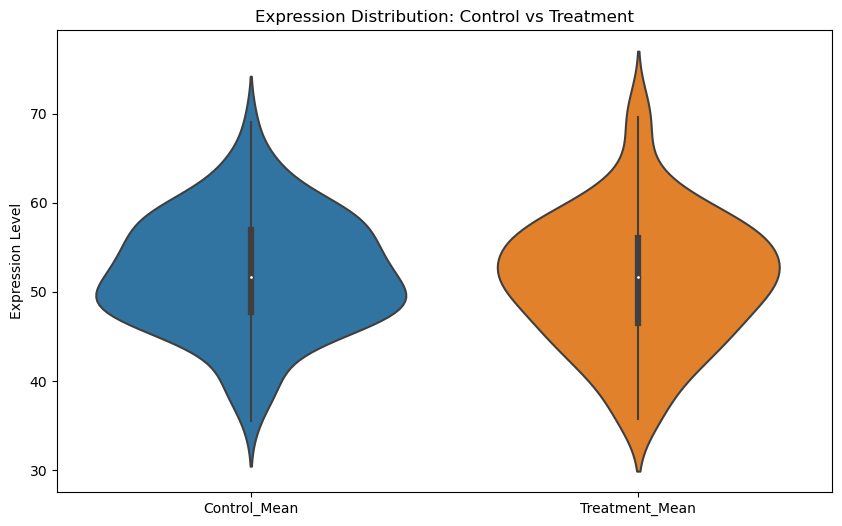

In [3]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['Control_Mean', 'Treatment_Mean']])
plt.title('Expression Distribution: Control vs Treatment')
plt.ylabel('Expression Level')
plt.show()

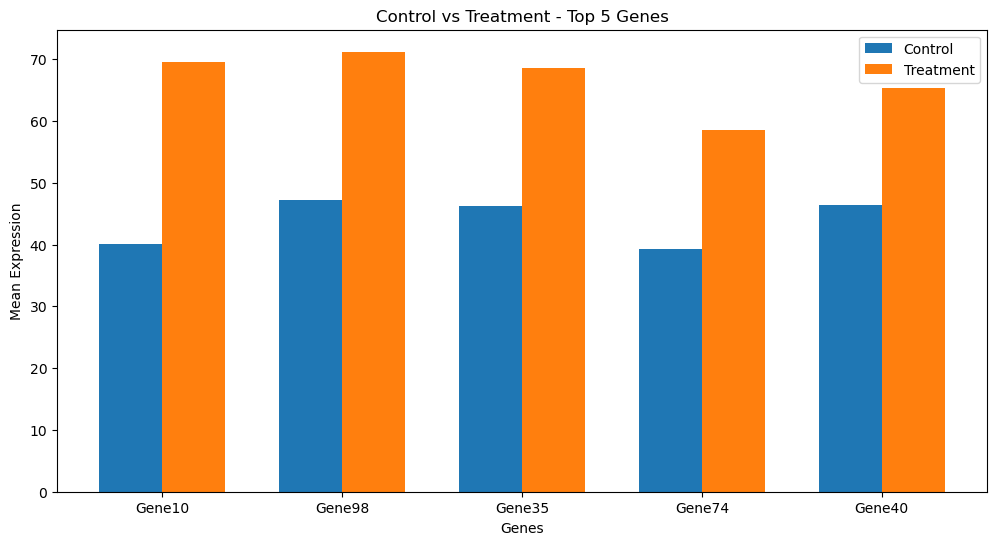

In [4]:
# Top 5 genes comparison
top5 = df.nlargest(5, 'Expression_Change')
x = np.arange(len(top5))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, top5['Control_Mean'], width, label='Control')
plt.bar(x + width/2, top5['Treatment_Mean'], width, label='Treatment')
plt.xlabel('Genes')
plt.ylabel('Mean Expression')
plt.title('Control vs Treatment - Top 5 Genes')
plt.xticks(x, top5['Gene'])
plt.legend()
plt.show()

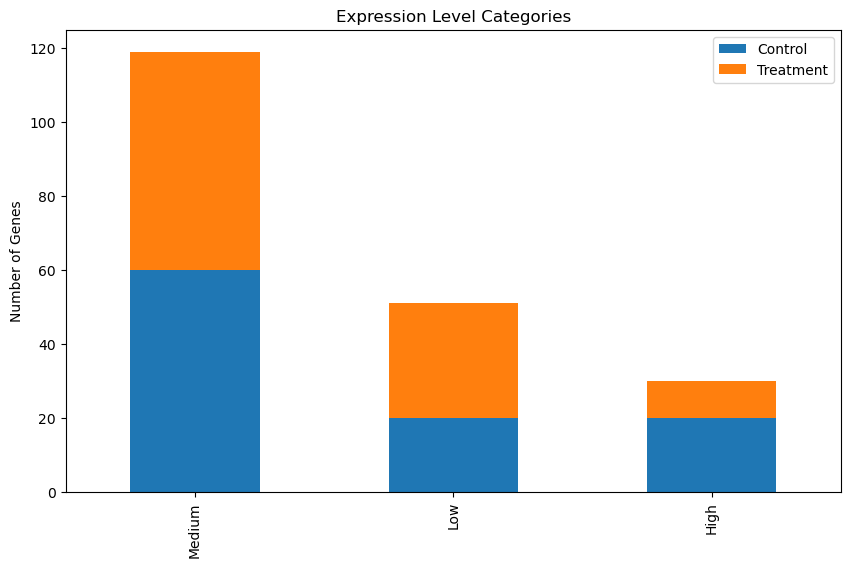

In [5]:
categories = ['Low', 'Medium', 'High']
control_cats = pd.cut(df['Control_Mean'], bins=3, labels=categories)
treatment_cats = pd.cut(df['Treatment_Mean'], bins=3, labels=categories)

count_data = pd.DataFrame({
    'Control': control_cats.value_counts(),
    'Treatment': treatment_cats.value_counts()
})

count_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Expression Level Categories')
plt.ylabel('Number of Genes')
plt.show()

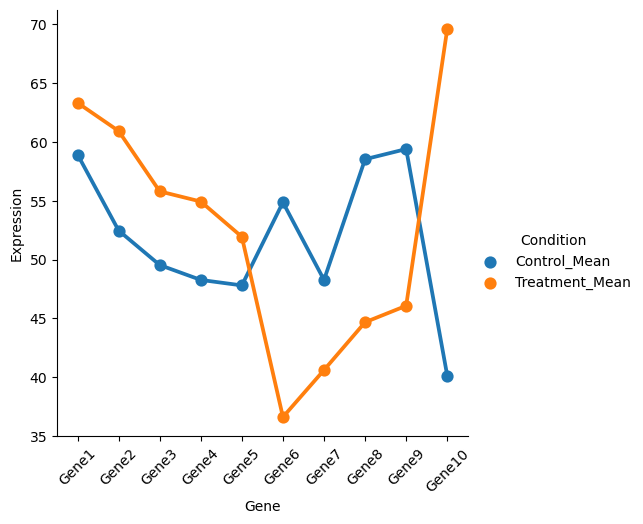

In [6]:
# Melt data for seaborn
melted = pd.melt(df[['Gene', 'Control_Mean', 'Treatment_Mean']].head(10), 
                id_vars=['Gene'], 
                value_vars=['Control_Mean', 'Treatment_Mean'],
                var_name='Condition', 
                value_name='Expression')

sns.catplot(data=melted, x='Gene', y='Expression', hue='Condition', kind='point')
plt.xticks(rotation=45)
plt.show()

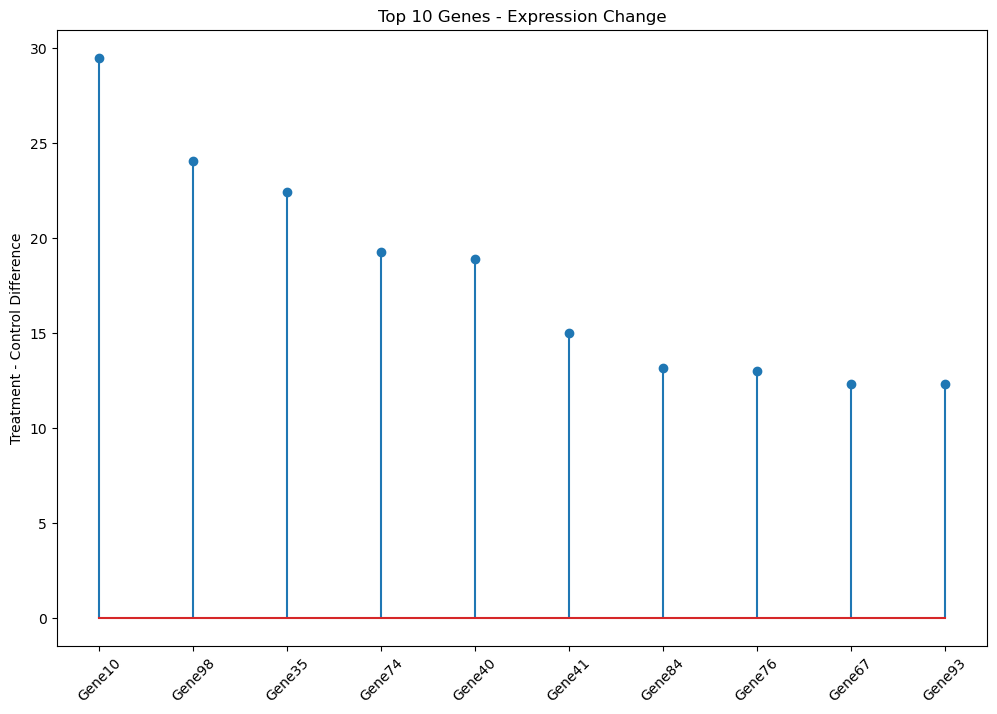

In [7]:
top10 = df.nlargest(10, 'Expression_Change')

plt.figure(figsize=(12, 8))
plt.stem(top10['Gene'], top10['Expression_Change'])
plt.xticks(rotation=45)
plt.title('Top 10 Genes - Expression Change')
plt.ylabel('Treatment - Control Difference')
plt.show()

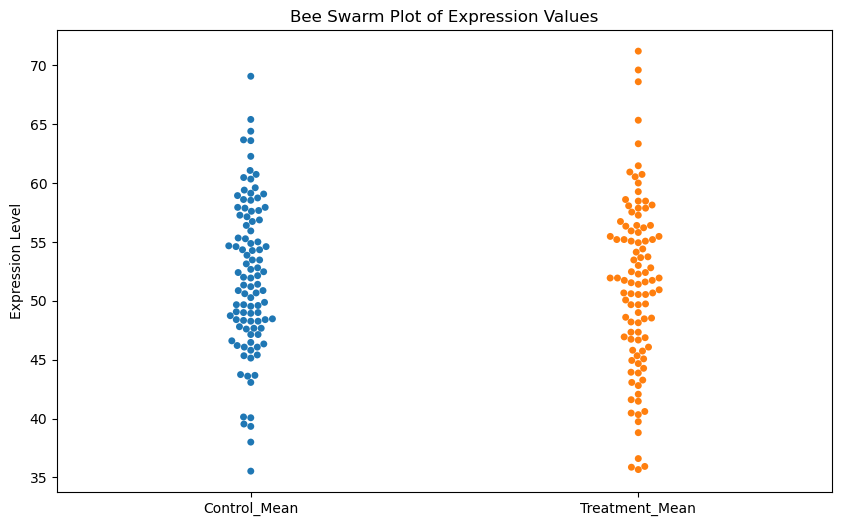

In [8]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df[['Control_Mean', 'Treatment_Mean']])
plt.title('Bee Swarm Plot of Expression Values')
plt.ylabel('Expression Level')
plt.show()

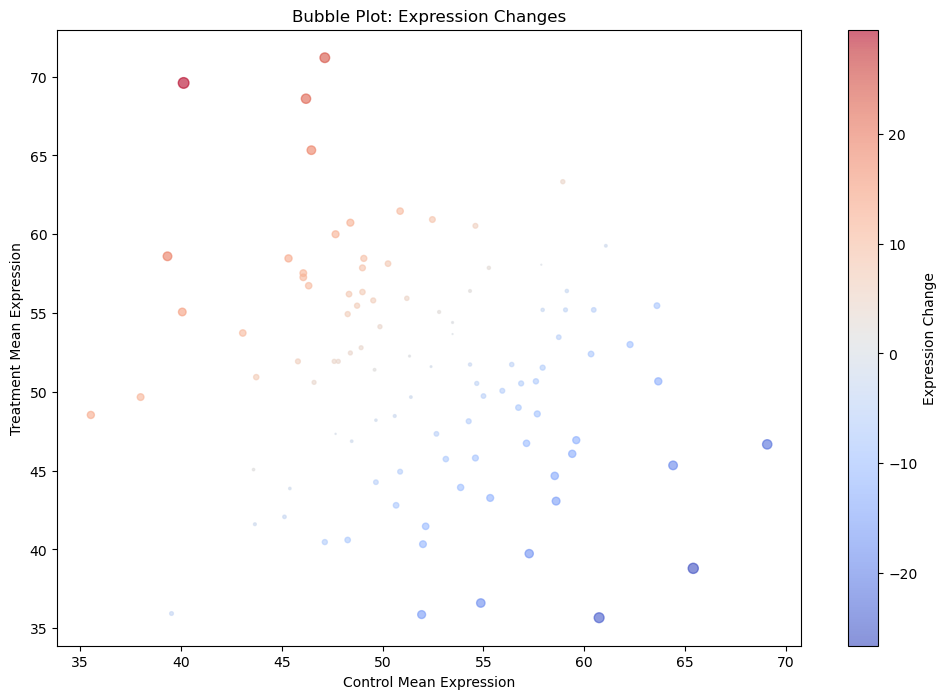

In [10]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Control_Mean'], df['Treatment_Mean'], 
                    s=df['Expression_Change'].abs()*2, 
                    alpha=0.6, c=df['Expression_Change'], cmap='coolwarm')
plt.colorbar(scatter, label='Expression Change')
plt.xlabel('Control Mean Expression')
plt.ylabel('Treatment Mean Expression')
plt.title('Bubble Plot: Expression Changes')
plt.show()

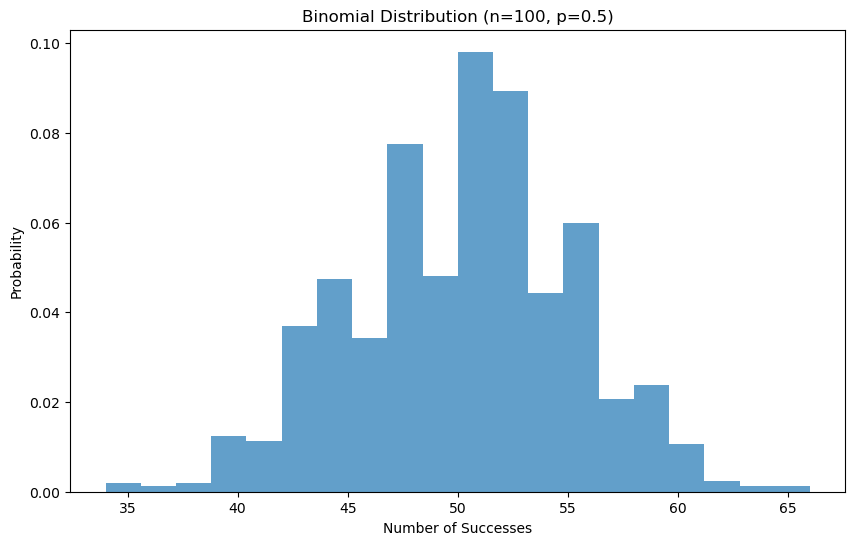

In [11]:
n, p = 100, 0.5
binomial_dist = np.random.binomial(n, p, 1000)

plt.figure(figsize=(10, 6))
plt.hist(binomial_dist, bins=20, density=True, alpha=0.7)
plt.title('Binomial Distribution (n=100, p=0.5)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

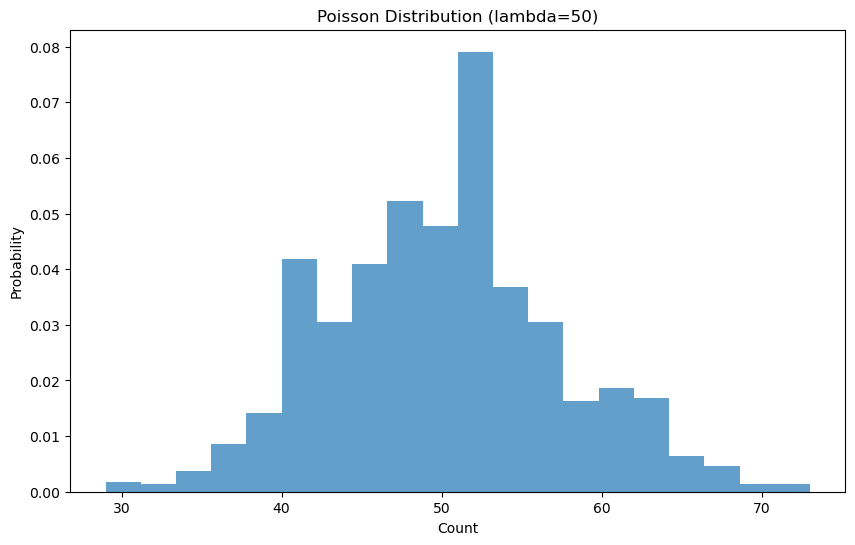

In [12]:
poisson_dist = np.random.poisson(50, 1000)

plt.figure(figsize=(10, 6))
plt.hist(poisson_dist, bins=20, density=True, alpha=0.7)
plt.title('Poisson Distribution (lambda=50)')
plt.xlabel('Count')
plt.ylabel('Probability')
plt.show()

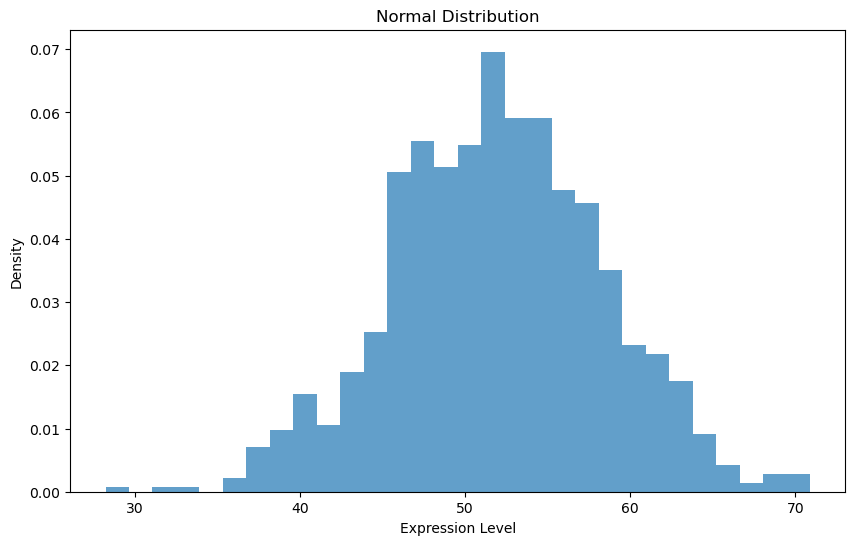

In [13]:
normal_dist = np.random.normal(df['Control_Mean'].mean(), df['Control_Mean'].std(), 1000)

plt.figure(figsize=(10, 6))
plt.hist(normal_dist, bins=30, density=True, alpha=0.7)
plt.title('Normal Distribution')
plt.xlabel('Expression Level')
plt.ylabel('Density')
plt.show()

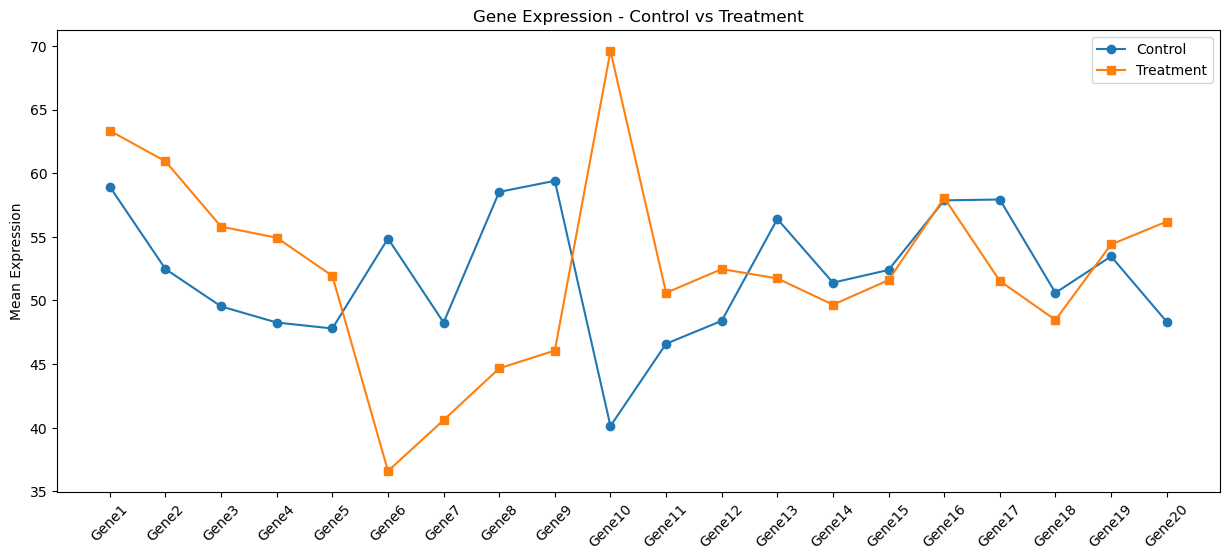

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(df['Gene'].head(20), df['Control_Mean'].head(20), marker='o', label='Control')
plt.plot(df['Gene'].head(20), df['Treatment_Mean'].head(20), marker='s', label='Treatment')
plt.xticks(rotation=45)
plt.ylabel('Mean Expression')
plt.title('Gene Expression - Control vs Treatment')
plt.legend()
plt.show()

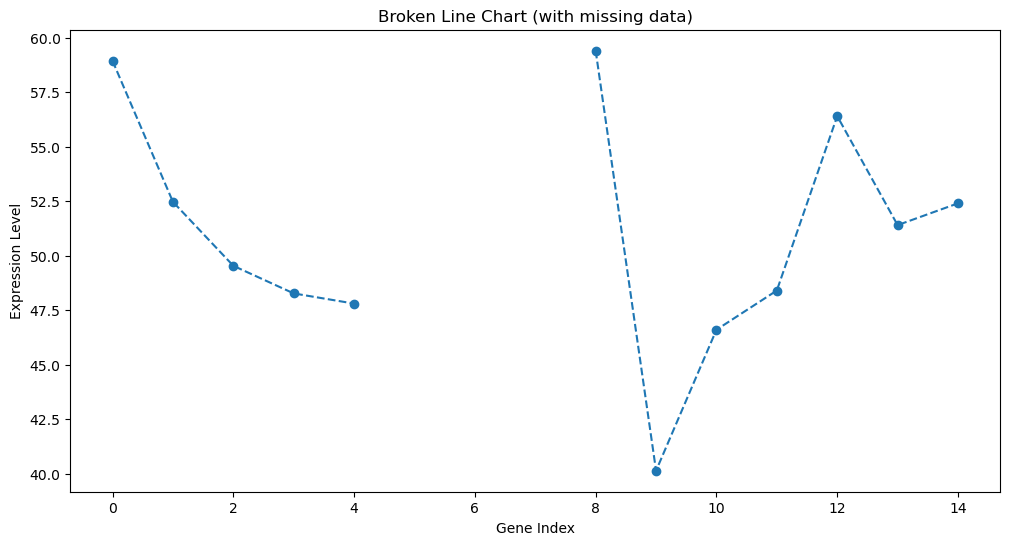

In [16]:
# Create artificial gaps
data_with_gaps = df['Control_Mean'].head(15).copy()
data_with_gaps.iloc[5:8] = np.nan

plt.figure(figsize=(12, 6))
plt.plot(data_with_gaps, marker='o', linestyle='--')
plt.title('Broken Line Chart (with missing data)')
plt.ylabel('Expression Level')
plt.xlabel('Gene Index')
plt.show()

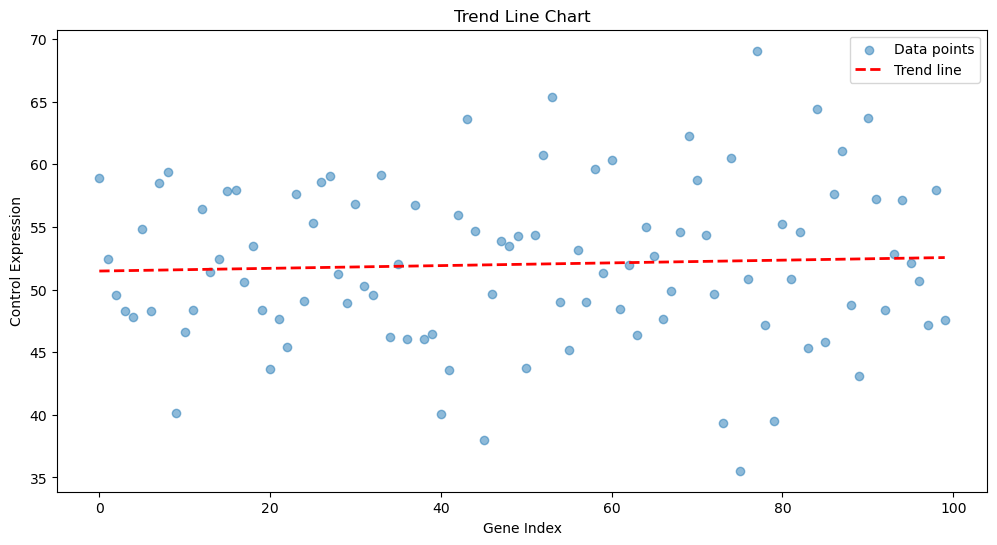

In [17]:
plt.figure(figsize=(12, 6))
x = range(len(df))
plt.scatter(x, df['Control_Mean'], alpha=0.5, label='Data points')

# Add trend line
z = np.polyfit(x, df['Control_Mean'], 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=2, label='Trend line')

plt.xlabel('Gene Index')
plt.ylabel('Control Expression')
plt.title('Trend Line Chart')
plt.legend()
plt.show()

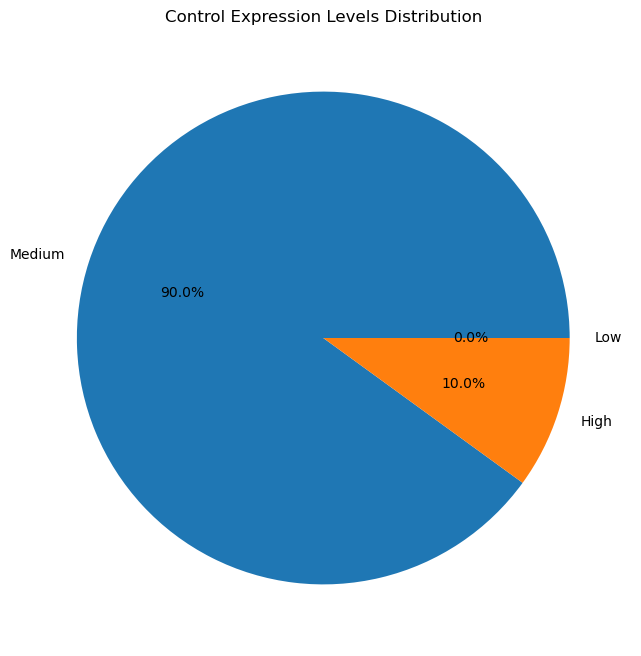

In [18]:
expression_levels = pd.cut(df['Control_Mean'], bins=[0, 30, 60, 100], 
                         labels=['Low', 'Medium', 'High']).value_counts()

plt.figure(figsize=(8, 8))
plt.pie(expression_levels.values, labels=expression_levels.index, autopct='%1.1f%%')
plt.title('Control Expression Levels Distribution')
plt.show()

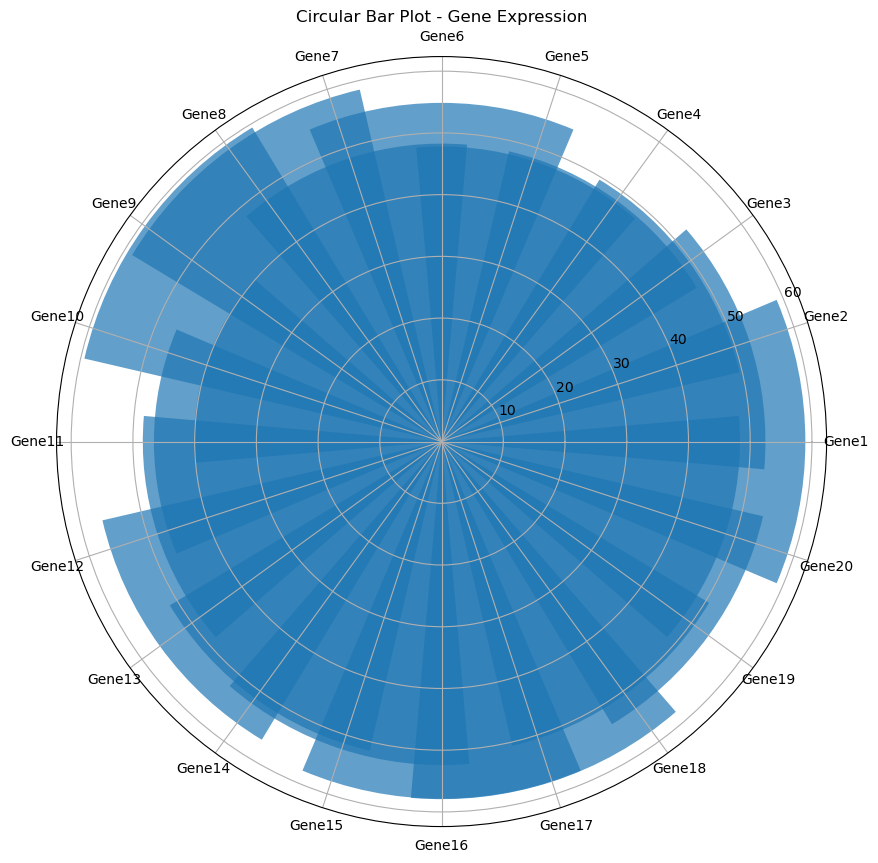

In [19]:
# Circular bar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
angles = np.linspace(0, 2*np.pi, len(df.head(20)), endpoint=False)
bars = ax.bar(angles, df['Control_Mean'].head(20), alpha=0.7)
ax.set_xticks(angles)
ax.set_xticklabels(df['Gene'].head(20))
plt.title('Circular Bar Plot - Gene Expression')
plt.show()

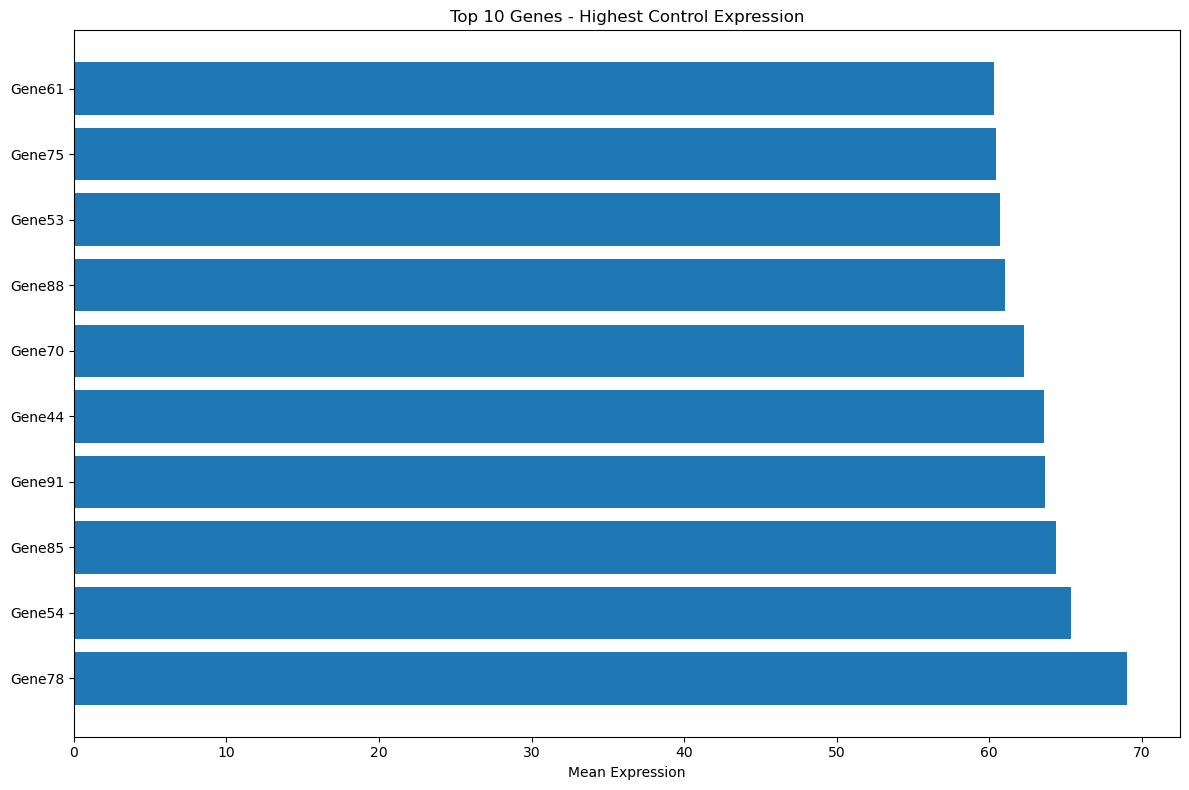

In [20]:
top10 = df.nlargest(10, 'Control_Mean')

plt.figure(figsize=(12, 8))
plt.barh(top10['Gene'], top10['Control_Mean'])
plt.xlabel('Mean Expression')
plt.title('Top 10 Genes - Highest Control Expression')
plt.tight_layout()
plt.show()

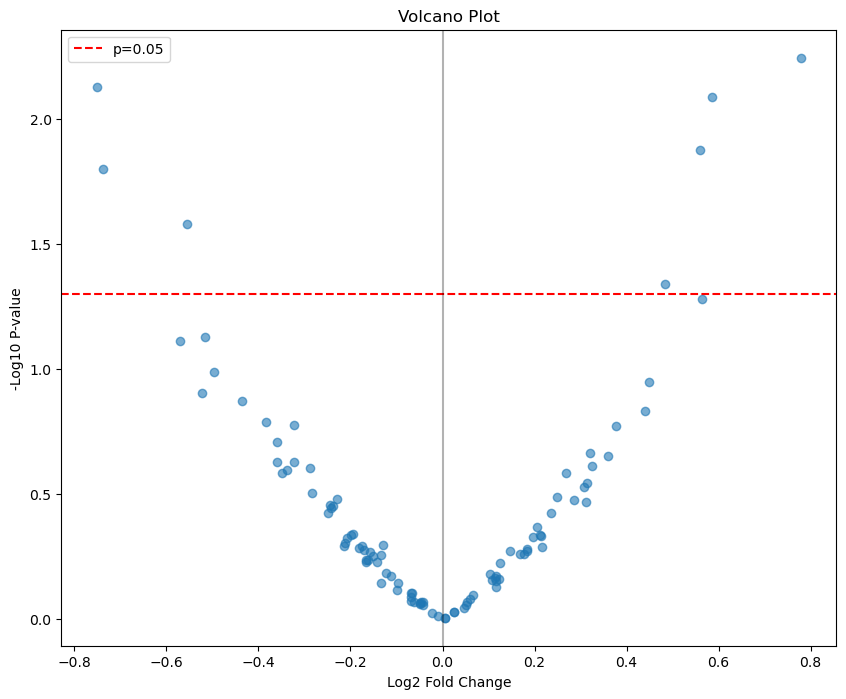

In [21]:
from scipy.stats import ttest_ind

# Calculate p-values (simplified)
p_values = []
for i in range(len(df)):
    t_stat, p_val = ttest_ind(df[control_cols].iloc[i], df[treatment_cols].iloc[i])
    p_values.append(p_val)

df['p_value'] = p_values
df['log2_fold_change'] = np.log2((df['Treatment_Mean']+1)/(df['Control_Mean']+1))
df['neg_log10_p'] = -np.log10(df['p_value'])

plt.figure(figsize=(10, 8))
plt.scatter(df['log2_fold_change'], df['neg_log10_p'], alpha=0.6)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')
plt.title('Volcano Plot')
plt.legend()
plt.show()

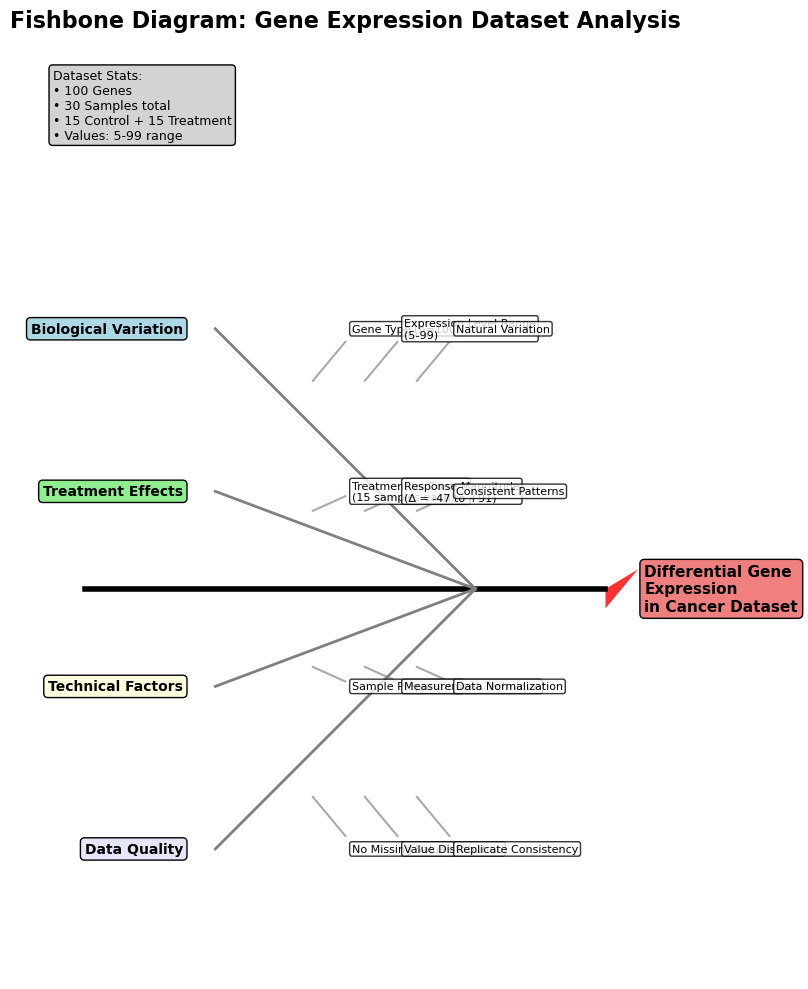

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def create_gene_expression_fishbone():
    fig, ax = plt.subplots(figsize=(16, 10))
    
    # Main spine
    ax.axhline(y=0, color='black', linewidth=4, xmin=0.1, xmax=0.9)
    
    # Fish head - Differential Expression
    head_x = [0.9, 0.95, 0.9]
    head_y = [0, 0.03, -0.03]
    ax.fill(head_x, head_y, 'red', alpha=0.8)
    ax.text(0.96, 0, 'Differential Gene\nExpression\nin Cancer Dataset', 
            ha='left', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    
    # Categories specific to your dataset
    categories = {
        'Biological Variation': [
            f'Gene Type (n=100)',
            'Expression Level Range\n(5-99)',
            'Natural Variation'
        ],
        'Treatment Effects': [
            'Treatment vs Control\n(15 samples each)',
            'Response Magnitude\n(Δ = -47 to +91)',
            'Consistent Patterns'
        ],
        'Technical Factors': [
            'Sample Preparation',
            'Measurement Technique',
            'Data Normalization'
        ],
        'Data Quality': [
            'No Missing Values',
            'Value Distribution',
            'Replicate Consistency'
        ]
    }
    
    y_positions = [0.4, 0.15, -0.15, -0.4]
    colors = ['lightblue', 'lightgreen', 'lightyellow', 'lavender']
    
    for i, ((category, causes), y_pos, color) in enumerate(zip(categories.items(), y_positions, colors)):
        # Main bone line
        bone_x = [0.3, 0.7]
        bone_y = [y_pos, 0]
        ax.plot(bone_x, bone_y, 'gray', linewidth=2)
        
        # Category label
        ax.text(0.25, y_pos, category, ha='right', va='center', 
                fontsize=10, fontweight='bold', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor=color))
        
        # Sub-causes with dataset-specific info
        for j, cause in enumerate(causes):
            sub_x = [0.45 + j*0.08, 0.5 + j*0.08]
            sub_y = [y_pos * 0.8, y_pos * 0.95]
            ax.plot(sub_x, sub_y, 'darkgray', linewidth=1.5)
            ax.text(0.51 + j*0.08, y_pos * 1.0, cause, ha='left', va='center', 
                    fontsize=8, bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    
    # Add dataset statistics
    stats_text = f"Dataset Stats:\n• 100 Genes\n• 30 Samples total\n• 15 Control + 15 Treatment\n• Values: 5-99 range"
    ax.text(0.05, 0.8, stats_text, ha='left', va='top', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.6, 0.8)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title('Fishbone Diagram: Gene Expression Dataset Analysis', 
              fontsize=16, fontweight='bold', pad=30)
    plt.tight_layout()
    plt.show()

create_gene_expression_fishbone()

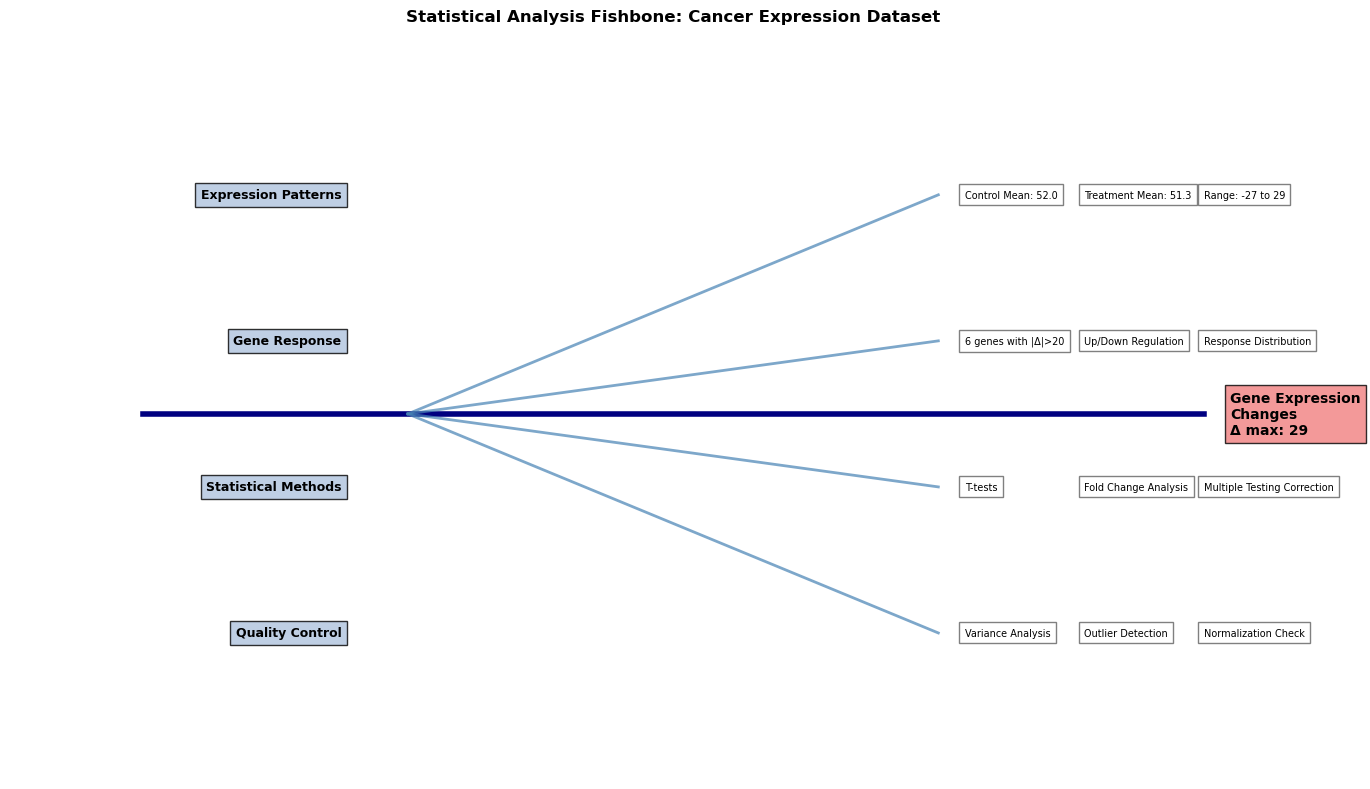

In [24]:
def statistical_fishbone_diagram():
    # Calculate some statistics from your data
    control_mean = df[control_cols].mean().mean()
    treatment_mean = df[treatment_cols].mean().mean()
    max_change = df['Expression_Change'].max()
    min_change = df['Expression_Change'].min()
    
    significant_genes = len(df[df['Expression_Change'].abs() > 20])  # Arbitrary threshold
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Main spine
    ax.axhline(y=0, color='navy', linewidth=4, xmin=0.1, xmax=0.9)
    
    # Categories for statistical analysis
    categories = {
        'Expression Patterns': [
            f'Control Mean: {control_mean:.1f}',
            f'Treatment Mean: {treatment_mean:.1f}',
            f'Range: {min_change:.0f} to {max_change:.0f}'
        ],
        'Gene Response': [
            f'{significant_genes} genes with |Δ|>20',
            'Up/Down Regulation',
            'Response Distribution'
        ],
        'Statistical Methods': [
            'T-tests',
            'Fold Change Analysis',
            'Multiple Testing Correction'
        ],
        'Quality Control': [
            'Variance Analysis',
            'Outlier Detection',
            'Normalization Check'
        ]
    }
    
    y_positions = [0.3, 0.1, -0.1, -0.3]
    
    for (category, causes), y_pos in zip(categories.items(), y_positions):
        # Bone line
        ax.plot([0.3, 0.7], [0, y_pos], 'steelblue', linewidth=2, alpha=0.7)
        
        # Category
        ax.text(0.25, y_pos, category, ha='right', va='center', 
                fontweight='bold', fontsize=9,
                bbox=dict(facecolor='lightsteelblue', alpha=0.8))
        
        # Causes with actual data
        for j, cause in enumerate(causes):
            ax.text(0.72 + j*0.09, y_pos, cause, ha='left', va='center', 
                    fontsize=7, bbox=dict(facecolor='white', edgecolor='gray'))
    
    # Problem statement with data
    ax.text(0.92, 0, f'Gene Expression\nChanges\nΔ max: {max_change:.0f}', 
            ha='left', va='center', fontweight='bold',
            bbox=dict(facecolor='lightcoral', alpha=0.8))
    
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, 0.5)
    ax.axis('off')
    plt.title('Statistical Analysis Fishbone: Cancer Expression Dataset', 
              fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

statistical_fishbone_diagram()

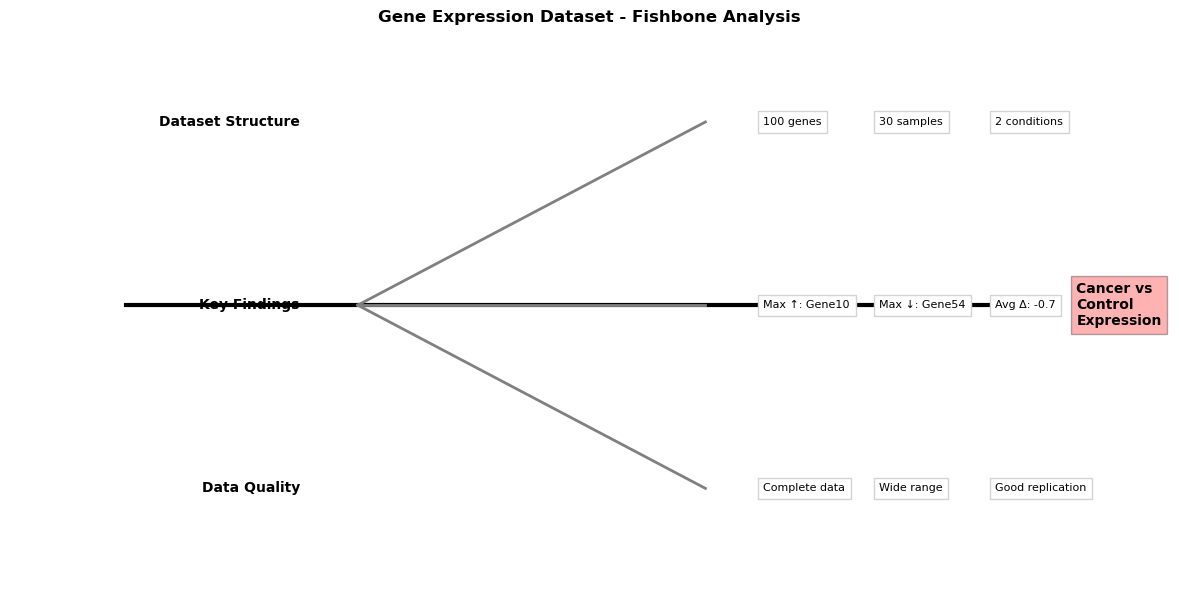

In [25]:
def simple_data_fishbone():
    # Calculate key metrics
    top_up = df.nlargest(1, 'Expression_Change')['Gene'].values[0]
    top_down = df.nsmallest(1, 'Expression_Change')['Gene'].values[0]
    avg_control = df['Control_Mean'].mean()
    avg_treatment = df['Treatment_Mean'].mean()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Main line
    ax.axhline(y=0, color='black', linewidth=3, xmin=0.1, xmax=0.9)
    
    # Simple categories
    factors = [
        ('Dataset Structure', [f'100 genes', '30 samples', '2 conditions']),
        ('Key Findings', [f'Max ↑: {top_up}', f'Max ↓: {top_down}', f'Avg Δ: {avg_treatment-avg_control:.1f}']),
        ('Data Quality', ['Complete data', 'Wide range', 'Good replication'])
    ]
    
    positions = [0.2, 0, -0.2]
    
    for (factor, details), pos in zip(factors, positions):
        ax.plot([0.3, 0.6], [0, pos], 'gray', linewidth=2)
        ax.text(0.25, pos, factor, ha='right', va='center', fontweight='bold')
        for i, detail in enumerate(details):
            ax.text(0.65 + i*0.1, pos, detail, ha='left', va='center', fontsize=8,
                   bbox=dict(facecolor='white', edgecolor='lightgray'))
    
    ax.text(0.92, 0, 'Cancer vs\nControl\nExpression', ha='left', va='center', 
            fontweight='bold', bbox=dict(facecolor='red', alpha=0.3))
    
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.3, 0.3)
    ax.axis('off')
    plt.title('Gene Expression Dataset - Fishbone Analysis', fontweight='bold')
    plt.tight_layout()
    plt.show()

simple_data_fishbone()

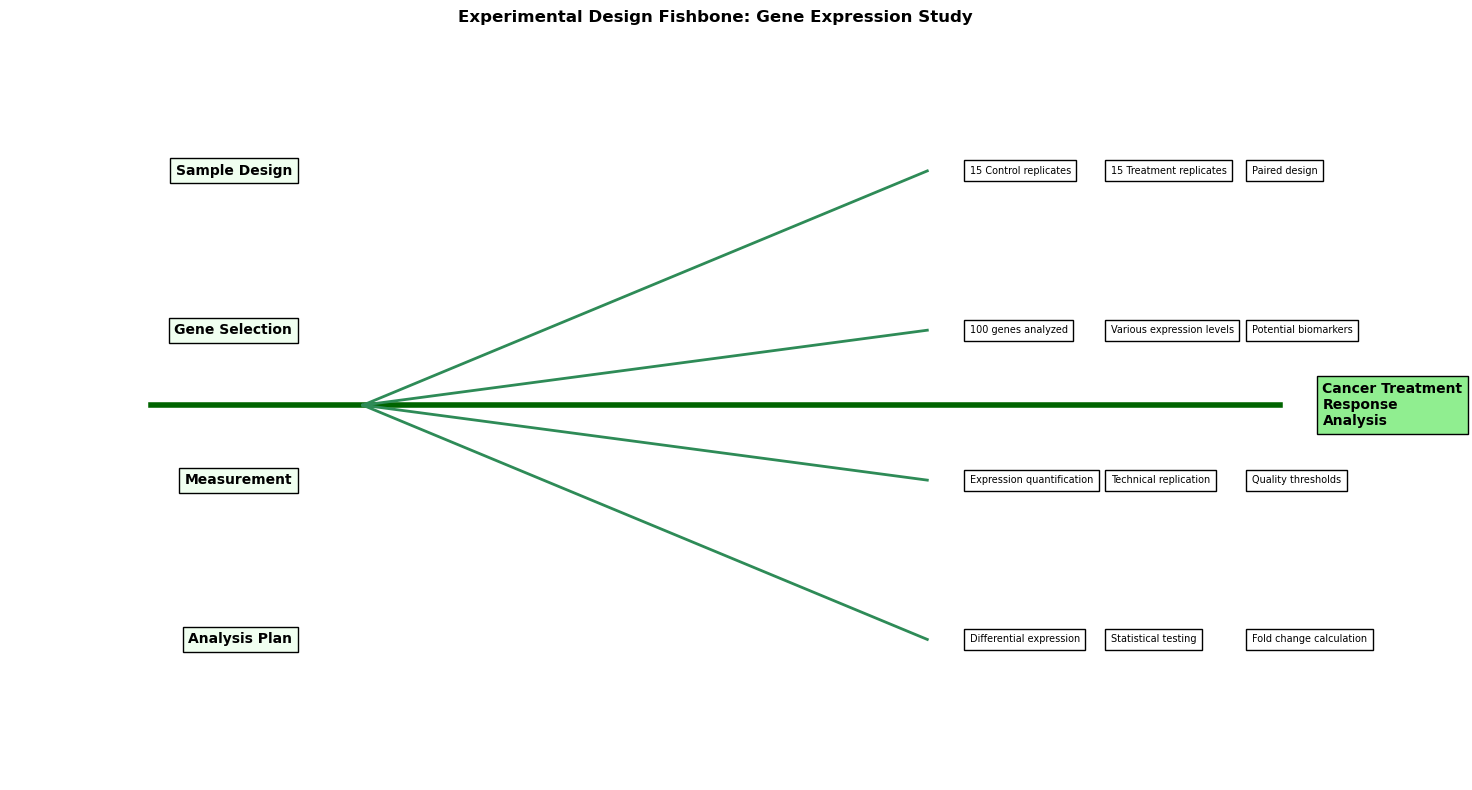

In [26]:
def experimental_design_fishbone():
    fig, ax = plt.subplots(figsize=(15, 8))
    
    ax.axhline(y=0, color='darkgreen', linewidth=4, xmin=0.1, xmax=0.9)
    
    # Experimental factors
    design_factors = {
        'Sample Design': [
            '15 Control replicates',
            '15 Treatment replicates',
            'Paired design'
        ],
        'Gene Selection': [
            '100 genes analyzed',
            'Various expression levels',
            'Potential biomarkers'
        ],
        'Measurement': [
            'Expression quantification',
            'Technical replication',
            'Quality thresholds'
        ],
        'Analysis Plan': [
            'Differential expression',
            'Statistical testing',
            'Fold change calculation'
        ]
    }
    
    y_positions = [0.25, 0.08, -0.08, -0.25]
    
    for (factor, details), y_pos in zip(design_factors.items(), y_positions):
        ax.plot([0.25, 0.65], [0, y_pos], 'seagreen', linewidth=2)
        ax.text(0.2, y_pos, factor, ha='right', va='center', 
                fontweight='bold', bbox=dict(facecolor='honeydew'))
        
        for j, detail in enumerate(details):
            ax.text(0.68 + j*0.1, y_pos, detail, ha='left', va='center', 
                    fontsize=7, bbox=dict(facecolor='white'))
    
    ax.text(0.93, 0, 'Cancer Treatment\nResponse\nAnalysis', ha='left', va='center',
            fontweight='bold', bbox=dict(facecolor='lightgreen'))
    
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.4, 0.4)
    ax.axis('off')
    plt.title('Experimental Design Fishbone: Gene Expression Study', fontweight='bold')
    plt.tight_layout()
    plt.show()

experimental_design_fishbone()